# Building Recommendation Engines from Python

## Part 1: Introduction to Recommendation Engines

**Recommendation Engines**

- Recommendation engines use the feedback of users to find new relevant items for them or for others with the assumption that *users who have similar preferences in the past are likely to have similar preferences in the future*.
- A better recommendation can be made for an item that has been given a lot of feedback, and more personalized recommendations can be given for a user that has given a lot of feedback.

**Implicit vs. explicit data**

*Implicit feedback:*
- A user often selecting the same genre of music.
- An item is repeatedly purchased by the same consumer.
- A viewer gives up halfway on a movie they were watching.

*Explicit feedback:*
- Ratings given on movie sites.
- A user telling a social media platform that an ad is not relevant to their interests.
- A user gives a thumbs up or thumbs down.

**Non-personalized recommendations**

- Made for all users, without taking their preferences into account.
- Example: Recommending the items most frequently seen together.
- Useful for first-time users.

*Methods:*
- Find the most used/purchased products.
- Find the products with highest ratings (under several constraints).
- Find the most commonly seen together items.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_ratings_df = pd.read_csv('user_ratings.csv')
user_ratings_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [4]:
# Get the counts of occurrences of each movie title
movie_popularity = user_ratings_df["title"].value_counts()

# Inspect the most common values
print(movie_popularity.head())

Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: title, dtype: int64


The most viewed movie was `Forrest Gump (1994)`.

In [5]:
# Find the mean of the ratings given to each title
average_rating_df = user_ratings_df[["title", "rating"]].groupby('title').mean()

# Order the entries by highest average rating to lowest
sorted_average_ratings = average_rating_df.sort_values(by='rating', ascending=False)

# Inspect the top movies
print(sorted_average_ratings.head())

                                     rating
title                                      
Gena the Crocodile (1969)               5.0
True Stories (1986)                     5.0
Cosmic Scrat-tastrophe (2015)           5.0
Love and Pigeons (1985)                 5.0
Red Sorghum (Hong gao liang) (1987)     5.0


The 5 movies with highest rating (5.0) were `Gena the Crocodile (1969)`, `True Stories (1986)`, `Cosmic Scrat-tastrophe (2015)`, `Love and Pigeons (1985)` and `Red Sorghum (Hong gao liang) (1987)`.

In [6]:
# Create a list of only movies appearing > 50 times in the dataset
movie_popularity = user_ratings_df["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

# Use this popular_movies list to filter the original DataFrame
popular_movies_rankings =  user_ratings_df[user_ratings_df["title"].isin(popular_movies)]

# Find the average rating given to these frequently watched films
popular_movies_average_rankings = popular_movies_rankings[["title", "rating"]].groupby('title').mean()
print(popular_movies_average_rankings.sort_values(by="rating", ascending=False).head())

                                                      rating
title                                                       
Shawshank Redemption, The (1994)                    4.429022
Godfather, The (1972)                               4.289062
Fight Club (1999)                                   4.272936
Cool Hand Luke (1967)                               4.271930
Dr. Strangelove or: How I Learned to Stop Worry...  4.268041


Over the movies with **at least 50 watches**, the 5 movies with the highest ratings changed to `Shawshank Redemption, The (1994)` (4.43), `Godfather, The (1972)` (4.30), `Fight Club (1999)` (4.27), `Cool Hand Luke (1967)` (4.27), `Dr. Strangelove or...` (4.27).

In [8]:
# Finding all pairs of movies
from itertools import permutations

# Create the function to find all permutations
def find_movie_pairs(x):
    pairs = pd.DataFrame(list(permutations(x.values, 2)),
                       columns=['movie_a', 'movie_b'])
    return pairs

# Apply the function to the title column and reset the index
movie_combinations = user_ratings_df.groupby('userId')['title'].apply(find_movie_pairs)
movie_combinations = movie_combinations.reset_index(drop=True)

print(movie_combinations)

                   movie_a                           movie_b
0         Toy Story (1995)           Grumpier Old Men (1995)
1         Toy Story (1995)                       Heat (1995)
2         Toy Story (1995)       Seven (a.k.a. Se7en) (1995)
3         Toy Story (1995)        Usual Suspects, The (1995)
4         Toy Story (1995)        From Dusk Till Dawn (1996)
...                    ...                               ...
60793295         31 (2016)                 Gen-X Cops (1999)
60793296         31 (2016)                  Bloodmoon (1997)
60793297         31 (2016)  Sympathy for the Underdog (1971)
60793298         31 (2016)                     Hazard (2005)
60793299         31 (2016)                Blair Witch (2016)

[60793300 rows x 2 columns]


In [11]:
# Calculate how often each item in movies_a occurs with the items in movies_b
combination_counts = movie_combinations.groupby(['movie_a', 'movie_b']).size()

# Convert the results to a DataFrame and reset the index
combination_counts_df = combination_counts.to_frame(name='size').reset_index()

# Sort the counts from highest to lowest
combination_counts_df.sort_values('size', ascending=False, inplace=True)
print(combination_counts_df.head())

                                   movie_a                           movie_b  \
20672049  Shawshank Redemption, The (1994)               Forrest Gump (1994)   
8538313                Forrest Gump (1994)  Shawshank Redemption, The (1994)   
8537603                Forrest Gump (1994)               Pulp Fiction (1994)   
18567035               Pulp Fiction (1994)               Forrest Gump (1994)   
20675275  Shawshank Redemption, The (1994)               Pulp Fiction (1994)   

          size  
20672049   231  
8538313    231  
8537603    230  
18567035   230  
20675275   222  


The most common pair was `Shawshank Redemption, The (1994)` and `Forrest Gump (1994)` with 231 duplicates.

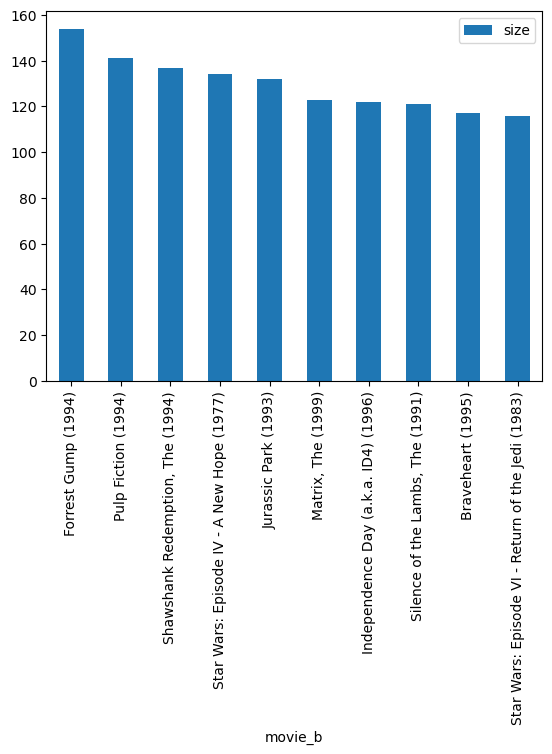

In [15]:
# Find the movies most frequently watched by people who watched Toy Story
toy_story_df = combination_counts_df[combination_counts_df['movie_a'] == 'Toy Story (1995)']

# Plot the results
toy_story_df[:10].plot.bar(x="movie_b")
plt.show()

The above figure show top 10 movies watch commonly in pairs with `Toy Story (1995)`.

## Part 2: Content-Based Recommendations

**Content-Based Recommendations**

- If a user likes product A, and product A is similar to product B (based on **attributes**), we will likely to recommend product B to the user.
- Ideal for recommendations for never-before-purchased products ==> suitable for a large retailer that has a constantly changing product line.

In [16]:
movies_df = pd.read_csv('movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
movie_genre_df = pd.DataFrame()
movie_genre_df['name'] = movies_df['title'].copy()
movie_genre_df['genre_list'] = movies_df['genres'].str.split('|')
movie_genre_df = movie_genre_df.explode('genre_list')
movie_genre_df.reset_index(inplace=True, drop=True)
movie_genre_df.head()

,name,genre_list
0,Toy Story (1995),Adventure
1,Toy Story (1995),Animation
2,Toy Story (1995),Children
3,Toy Story (1995),Comedy
4,Toy Story (1995),Fantasy


In [25]:
# Create cross-tabulated DataFrame from name and genre_list columns
movie_cross_table = pd.crosstab(movie_genre_df['name'], movie_genre_df['genre_list'])

# Select only the rows with Toy Story as the index
toy_story_genres_ct = movie_cross_table[movie_cross_table.index == 'Toy Story (1995)']
display(toy_story_genres_ct)

genre_list,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
name,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


The genres of `Toy Story (1995)` are set as 1 at `Adventure`, `Animation`, `Children`, `Comedy` and `Fantasy`.

In [26]:
movie_cross_table.head()

genre_list,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
name,,,,,,,,,,,,,,,,,,,,
'71 (2014),0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
'Hellboy': The Seeds of Creation (2004),0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
'Round Midnight (1986),0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
'Salem's Lot (2004),0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
'Til There Was You (1997),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


**Making recommendations based on Jaccard similarity**

*Jaccard similarity:*

$$J(A,B) = \frac{A \cap B}{A \cup B}$$

In [27]:
# METHOD 1: Using sklearn.metrics.jaccard_score for single pair
from sklearn.metrics import jaccard_score

# Extract just the rows containing Forrest Gump and Toy Story
forrest_gump_values = movie_cross_table.loc['Forrest Gump (1994)'].values
toy_story_values = movie_cross_table.loc['Toy Story (1995)'].values

# Find the similarity between GoldenEye and Toy Story
print(jaccard_score(forrest_gump_values, toy_story_values))

0.125


In [29]:
# METHOD 2: Using pdist and squareform from scipy.spatial.distance
from scipy.spatial.distance import pdist, squareform

# Calculate all pairwise distances
jaccard_distances = pdist(movie_cross_table.values, metric='jaccard')

# Convert the distances to a square matrix
jaccard_similarity_array = 1 - squareform(jaccard_distances)

# Wrap the array in a pandas DataFrame
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_array, columns=movie_cross_table.index, index=movie_cross_table.index)

# Print the top 5 rows of the DataFrame
display(jaccard_similarity_df.head())

name,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
name,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.000000,0.125,0.200000,0.333333,0.200000,0.0,0.0,0.25,0.166667,0.000000,...,0.40,0.40,0.2,0.2,0.200000,0.400000,0.400000,0.400000,0.000000,0.000000
'Hellboy': The Seeds of Creation (2004),0.125000,1.000,0.000000,0.000000,0.000000,0.0,0.2,0.00,0.142857,0.285714,...,0.00,0.00,0.0,0.0,0.000000,0.142857,0.142857,0.142857,0.166667,0.166667
'Round Midnight (1986),0.200000,0.000,1.000000,0.200000,0.333333,0.0,0.0,0.50,0.250000,0.000000,...,0.25,0.25,0.0,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333
'Salem's Lot (2004),0.333333,0.000,0.200000,1.000000,0.200000,0.0,0.0,0.25,0.166667,0.000000,...,0.40,0.75,0.5,0.5,0.200000,0.166667,0.166667,0.166667,0.000000,0.000000
'Til There Was You (1997),0.200000,0.000,0.333333,0.200000,1.000000,0.5,0.0,0.50,0.666667,0.000000,...,0.25,0.25,0.0,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
# Find the values for the movie Thor
jaccard_similarity_series = jaccard_similarity_df.loc["'Til There Was You (1997)"]

# Sort these values from highest to lowest
ordered_similarities = jaccard_similarity_series.sort_values(ascending=False)

# Print the results
print(ordered_similarities)

name
Perfect (1985)                                    1.0
In America (2002)                                 1.0
Valmont (1989)                                    1.0
Love Affair (1994)                                1.0
And Your Mother Too (Y tu mamá también) (2001)    1.0
                                                 ... 
In the Loop (2009)                                0.0
In the Line of Fire (1993)                        0.0
In the Army Now (1994)                            0.0
In a World... (2013)                              0.0
À nous la liberté (Freedom for Us) (1931)         0.0
Name: 'Til There Was You (1997), Length: 9737, dtype: float64


**Text-based similarities using TF-IDF and Cosine similarity**

Sample code: But is not used in this notebook

```python
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizer object and transform the plot column
vectorizer = TfidfVectorizer(max_df=0.7, min_df=2)
vectorized_data = vectorizer.fit_transform(df_plots['Plot']) 

# Create Dataframe from TF-IDFarray
tfidf_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names())

# Assign the movie titles to the index and inspect
tfidf_df.index = df_plots['Title']
print(tfidf_df.head())
```
--------------------
```python
# Import cosine_similarity measure
from sklearn.metrics.pairwise import cosine_similarity

# Create the array of cosine similarity values
cosine_similarity_array = cosine_similarity(tfidf_summary_df)

# Wrap the array in a pandas DataFrame
cosine_similarity_df = pd.DataFrame(cosine_similarity_array, columns=tfidf_summary_df.index, index=tfidf_summary_df.index)

# Print the top 5 rows of the DataFrame
print(cosine_similarity_df.head())

# Find the values for the movie Rio
cosine_similarity_series = cosine_similarity_df.loc['Rio']

# Sort these values highest to lowest
ordered_similarities = cosine_similarity_series.sort_values(ascending=False)

# Print the results
print(ordered_similarities)
```

**User profile recommendations**

Form a user feature vector from the mean of all products that the user has used. And find the similarity between that vector with other products' vectors.

In [34]:
user_ratings_df['title'].unique()[:20]

array(['Toy Story (1995)', 'Grumpier Old Men (1995)', 'Heat (1995)',
       'Seven (a.k.a. Se7en) (1995)', 'Usual Suspects, The (1995)',
       'From Dusk Till Dawn (1996)', 'Bottle Rocket (1996)',
       'Braveheart (1995)', 'Rob Roy (1995)', 'Canadian Bacon (1995)',
       'Desperado (1995)', 'Billy Madison (1995)', 'Clerks (1994)',
       'Dumb & Dumber (Dumb and Dumber) (1994)', 'Ed Wood (1994)',
       'Star Wars: Episode IV - A New Hope (1977)', 'Pulp Fiction (1994)',
       'Stargate (1994)', 'Tommy Boy (1995)',
       'Clear and Present Danger (1994)'], dtype=object)

In [36]:
list_of_movies_enjoyed_by_user_A = [
    'Toy Story (1995)',
    'Tommy Boy (1995)',
    'Star Wars: Episode IV - A New Hope (1977)',
    'Pulp Fiction (1994)',
    'Heat (1995)'
]

# Create a subset of only the movies the user has enjoyed
movies_enjoyed_df = movie_cross_table.reindex(list_of_movies_enjoyed_by_user_A)

# Generate the user profile by finding the average scores of movies they enjoyed
user_prof = movies_enjoyed_df.mean()

# Inspect the results
print(user_prof)

genre_list
(no genres listed)    0.0
Action                0.4
Adventure             0.4
Animation             0.2
Children              0.2
Comedy                0.6
Crime                 0.4
Documentary           0.0
Drama                 0.2
Fantasy               0.2
Film-Noir             0.0
Horror                0.0
IMAX                  0.0
Musical               0.0
Mystery               0.0
Romance               0.0
Sci-Fi                0.2
Thriller              0.4
War                   0.0
Western               0.0
dtype: float64


In [40]:
from sklearn.metrics.pairwise import cosine_similarity

# Find subset of tfidf_df that does not include movies in list_of_movies_enjoyed
movie_subset_df = movie_cross_table.drop(list_of_movies_enjoyed_by_user_A, axis=0)

# Calculate the cosine_similarity and wrap it in a DataFrame
similarity_array = cosine_similarity(user_prof.values.reshape(1, -1), movie_subset_df)
similarity_df = pd.DataFrame(similarity_array.T, index=movie_subset_df.index, columns=["similarity_score"])

# Sort the values from high to low by the values in the similarity_score
sorted_similarity_df = similarity_df.sort_values(by="similarity_score", ascending=False)

# Inspect the most similar to the user preferences
print(sorted_similarity_df.head())

                                               similarity_score
name                                                           
Machete (2010)                                         0.898146
Charlie's Angels: Full Throttle (2003)                 0.898146
After the Sunset (2004)                                0.898146
Diamond Arm, The (Brilliantovaya ruka) (1968)          0.898146
Police Story (Ging chaat goo si) (1985)                0.821584


## Part 3: Collaborative filtering

**Collaborative filtering**

Find the users that have the most similar preferences to the user we are making recommendations for and based on that group's preferences to make suggestions.

In [65]:
user_ratings_pivot = user_ratings_df.pivot_table(
    index='userId',
    columns='title',
    values='rating'
)
user_ratings_pivot.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# Unuseful approach: subtract the whole dataframe with columns means and fill nulls with zeros
avg_ratings = user_ratings_pivot.mean(axis=1)
user_ratings_centered = user_ratings_pivot.sub(avg_ratings, axis=0)
user_ratings_centered.fillna(0, inplace=True)
user_ratings_centered.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.366379,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [68]:
movie_ratings_centered = user_ratings_centered.T

# Generate the similarity matrix
similarities = cosine_similarity(movie_ratings_centered)

# Wrap the similarities in a DataFrame
cosine_similarity_df = pd.DataFrame(similarities, index=movie_ratings_centered.index, columns=movie_ratings_centered.index)

# Find the similarity values for a specific movie
cosine_similarity_series = cosine_similarity_df.loc['Toy Story (1995)']

# Sort these values highest to lowest
ordered_similarities = cosine_similarity_series.sort_values(ascending=False)

print(ordered_similarities)

title
Toy Story (1995)                               1.000000
Toy Story 2 (1999)                             0.403421
Toy Story 3 (2010)                             0.327486
Aladdin (1992)                                 0.327246
Wallace & Gromit: The Wrong Trousers (1993)    0.305482
                                                 ...   
Honey, I Blew Up the Kid (1992)               -0.222452
Batman & Robin (1997)                         -0.223621
Around the World in 80 Days (2004)            -0.229409
Mixed Nuts (1994)                             -0.233548
Flintstones in Viva Rock Vegas, The (2000)    -0.285489
Name: Toy Story (1995), Length: 9719, dtype: float64


**Using K-Nearest Neighbors**

In [55]:
# Find user-user similarity matrix
similarities = cosine_similarity(user_ratings_pivot)
user_similarities = pd.DataFrame(similarities,
                                    index=user_ratings_pivot.index,
                                    columns=user_ratings_pivot.index)
user_similarities.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.001265,0.000553,0.048419,0.021847,-0.045497,-0.006200,0.047013,0.019510,-0.008754,...,0.018127,-0.017172,-0.015221,-0.037059,-0.029121,0.012016,0.055261,0.075224,-0.025713,0.010932
2,0.001265,1.000000,0.000000,-0.017164,0.021796,-0.021051,-0.011114,-0.048085,0.000000,0.003012,...,-0.050551,-0.031581,-0.001688,0.000000,0.000000,0.006226,-0.020504,-0.006001,-0.060091,0.024999
3,0.000553,0.000000,1.000000,-0.011260,-0.031539,0.004800,0.000000,-0.032471,0.000000,0.000000,...,-0.004904,-0.016117,0.017749,0.000000,-0.001431,-0.037289,-0.007789,-0.013001,0.000000,0.019550
4,0.048419,-0.017164,-0.011260,1.000000,-0.029620,0.013956,0.058091,0.002065,-0.005874,0.051590,...,-0.037687,0.063122,0.027640,-0.013782,0.040037,0.020590,0.014628,-0.037569,-0.017884,-0.000995
5,0.021847,0.021796,-0.031539,-0.029620,1.000000,0.009111,0.010117,-0.012284,0.000000,-0.033165,...,0.015964,0.012427,0.027076,0.012461,-0.036272,0.026319,0.031896,-0.001751,0.093829,-0.000278


In [69]:
target_movie = 'Toy Story (1995)'
target_user_id = 2

# Isolate the similarity scores for target_user
user_similarity_series = user_similarities.loc[target_user_id]
ordered_similarities = user_similarity_series.sort_values(ascending=False)

# Find the top 10 most similar users
nearest_neighbors = ordered_similarities[1:11].index

# Extract the ratings of the neighbors
neighbor_ratings = user_ratings_pivot.reindex(nearest_neighbors)

# Calculate the mean rating given by the users nearest neighbors
print(user_ratings_pivot[target_movie].mean())

3.9209302325581397


In [73]:
# Drop the column you are trying to predict
user_ratings_centered.drop(target_movie, axis=1, inplace=True)

# Get the data for the user you are predicting for
target_user_x = user_ratings_centered.loc[[target_user_id]]

# Get the target data from user_ratings_pivot
other_users_y = user_ratings_pivot[target_movie]

# Get the data for only those that have seen the movie
other_users_x = user_ratings_centered[other_users_y.notnull()]

# Remove those that have not seen the movie from the target
other_users_y.dropna(inplace=True)

In [74]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the user KNN model
user_knn = KNeighborsRegressor(metric='cosine', n_neighbors=10)

# Fit the model and predict the target user
user_knn.fit(other_users_x, other_users_y)
user_user_pred = user_knn.predict(target_user_x)

print(user_user_pred)

[3.55]


In [72]:
other_users_x

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


**Item-based or user-based**

- *Item-based recommendations* are where you use the average of the k most similar items that a user has rated to suggest a rating for an item they haven't yet seen.
- *User-based recommendations* are when you use the average of the ratings of the k most similar users gave an item, to suggest what rating the target user would give it.

**Item-based filtering:**

Pros:
- Consistent over time.
- Easier to explain (persuade, i.e., it makes more sense to encourage people to read a book because they liked a similar one than because a user they have never met liked it.
- Can be pre-calculated (do offline).

Cons:
- Often very obvious.

**User-based filtering:**

Pros:
- Can create a lot more interesting suggestions.

Cons:
- Generally beaten by item-based recommendations using standard metrics.

## Part 4: Matrix Factorization and Validating Your Predictions

**Matrix Factorization**

- Singular value decomposition (SVD)

In [77]:
# Import the required libraries 
from scipy.sparse.linalg import svds

# Decompose the matrix
U, sigma, Vt = svds(user_ratings_centered.values)

# Convert sigma into a diagonal matrix
sigma = np.diag(sigma)
print(sigma)

[[36.54879848  0.          0.          0.          0.          0.        ]
 [ 0.         37.92908232  0.          0.          0.          0.        ]
 [ 0.          0.         39.35979022  0.          0.          0.        ]
 [ 0.          0.          0.         41.77878991  0.          0.        ]
 [ 0.          0.          0.          0.         43.58650985  0.        ]
 [ 0.          0.          0.          0.          0.         76.10915911]]


In [88]:
# Dot product of U and sigma
U_sigma = np.dot(U, sigma)

# Dot product of result and Vt
U_sigma_Vt = np.dot(U_sigma, Vt)

# Add back on the row means contained in avg_ratings
uncentered_ratings = U_sigma_Vt + avg_ratings.values.reshape(-1, 1)

# Create DataFrame of the results
user_ratings_pivot.drop(target_movie, axis=1, inplace=True)
calc_pred_ratings_df = pd.DataFrame(uncentered_ratings, 
                                    index=user_ratings_pivot.index,
                                    columns=user_ratings_pivot.columns
                                   )
# Print both the recalculated matrix and the original 
display(calc_pred_ratings_df)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.366754,4.366866,4.366117,4.366424,4.365871,4.367680,4.363721,4.365187,4.400013,4.366065,...,4.359781,4.365537,4.367345,4.366395,4.366327,4.387612,4.333520,4.357203,4.346802,4.366730
2,3.948463,3.948253,3.948293,3.948273,3.948342,3.948061,3.949374,3.948554,3.945014,3.948519,...,3.946938,3.949848,3.947474,3.947201,3.948247,3.945904,3.945731,3.946353,3.950821,3.948146
3,2.436705,2.435661,2.435995,2.435841,2.436167,2.435705,2.442798,2.438588,2.420885,2.439401,...,2.437780,2.442042,2.432609,2.431395,2.435774,2.427461,2.436767,2.430344,2.441664,2.435342
4,3.553549,3.556055,3.555343,3.555822,3.555179,3.558823,3.493634,3.545729,3.530882,3.544172,...,3.528289,3.539592,3.563278,3.566573,3.555779,3.588920,3.542831,3.579766,3.533687,3.557417
5,3.636037,3.636606,3.636260,3.636443,3.636169,3.638005,3.632767,3.635189,3.638911,3.635788,...,3.635816,3.632224,3.638619,3.639064,3.636447,3.645722,3.637267,3.638753,3.627719,3.637009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.656735,3.660743,3.655941,3.658583,3.655287,3.677162,3.552643,3.638054,3.688494,3.673532,...,3.661514,3.630567,3.673515,3.673354,3.658172,3.795692,3.648755,3.647499,3.531964,3.662384
607,3.785764,3.786348,3.785973,3.786111,3.785746,3.785859,3.790337,3.784999,3.821221,3.787513,...,3.796385,3.782952,3.788143,3.788444,3.786206,3.794091,3.790551,3.784085,3.777616,3.786185
608,3.144252,3.135628,3.133459,3.134764,3.134405,3.110843,2.846344,3.095852,3.389153,3.243462,...,3.286236,3.227655,3.091086,3.073159,3.134046,3.218615,3.167639,2.972383,3.073169,3.116453


In [81]:
avg_ratings.values.reshape(-1, 1).shape

(610, 1)

**Validating your predictions**

Unlike other machine learning problems, we can split the dataset into training set and test set on observations, since the data is too sparse. Instead, we need to remove a different chunk of the DataFrame.

![Selecting Validation Set](img1.png)

Measure by Root Mean Squared Error.